In [3]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter(action='ignore',category='FutureWarning')


In [4]:
ds_data=pd.read_csv(r"D:\NEW Downloads\data-science-salaries Project\ds_salaries Data SET.csv " )

In [5]:
ds_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [22]:
ds_data.shape

(3755, 11)

In [24]:
ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


### Data wrangling

In [29]:
ds_data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [30]:
ds_data.duplicated().sum()

1171

In [31]:
ds_data.employment_type.unique() 

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [32]:
ds_data.job_title.unique() 

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [19]:
ds_data.loc[ds_data.experience_level=="SE",ds_data.columns=="job_title"]="Senior"
ds_data.loc[ds_data.experience_level=="MI",ds_data.columns=="job_title"]="Mid-Level"

ds_data.loc[ds_data.employment_type =="FT",ds_data.columns=="job_title"]="Full-Time"
ds_data.loc[ds_data.employment_type=="CT",ds_data.columns=="job_title"]="Contract"

ds_data.loc[ds_data.employee_residence=="ES",ds_data.columns=="job_title"]="Spain"
ds_data.loc[ds_data.employee_residence=="US",ds_data.columns=="job_title"]="United states"
ds_data.loc[ds_data.employee_residence=="Ca",ds_data.columns=="job_title"]="Canada"

In [20]:
ds_data.loc[ds_data.job_title=="Applied Scientist",ds_data.columns=="job_title"]="Applied Data Scientist"

In [21]:
ds_data["job_title"]=ds_data["job_title"].replace({"Applied Scientist":"Applied Data Scientist","ML Engineer":"Machine Learning Engineer"})

In [22]:
ds_data['remote_ratio']=ds_data['remote_ratio'].replace({0:'On-Site',100:'Remote work',50:'Hybrid'}) 

In [23]:
ds_data.describe()

,work_year,salary,salary_in_usd
count,3755.000000,3.755000e+03,3755.000000
mean,2022.373635,1.906956e+05,137570.389880
std,0.691448,6.716765e+05,63055.625278
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.380000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


In [24]:
ds_data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Univariate analysis

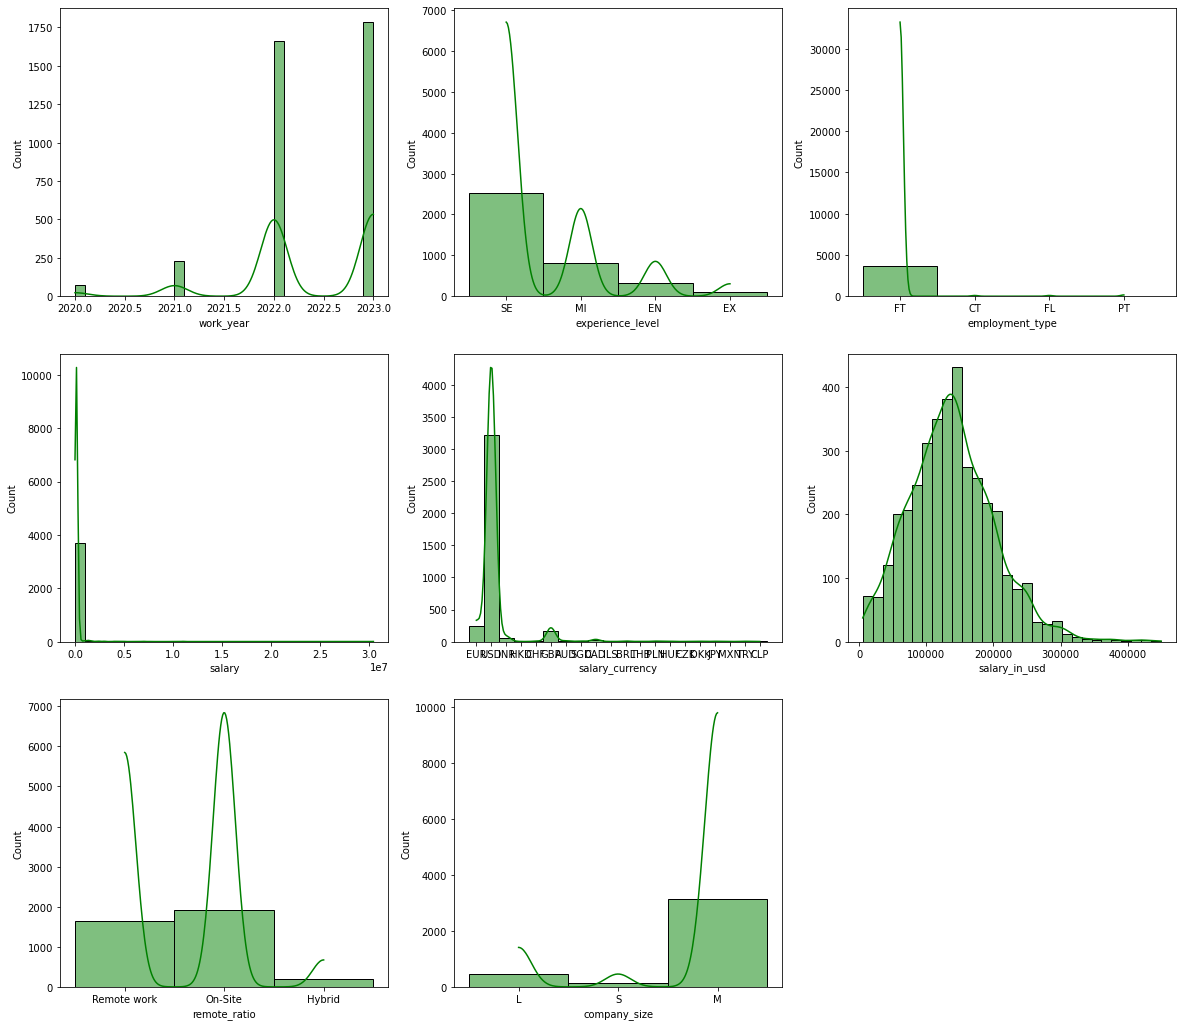

In [25]:
plt.figure(figsize=(20,18))
for i, col in enumerate(['work_year', 'experience_level', 'employment_type', 'salary', 'salary_currency', 'salary_in_usd', 'remote_ratio', 'company_size']):
    plt.subplot(3, 3, i+1)
    sea.histplot(data=ds_data, x=col, kde=True, bins=30, color='green')
plt.show()

   

 


In [26]:
ds_data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Top 10 jobs

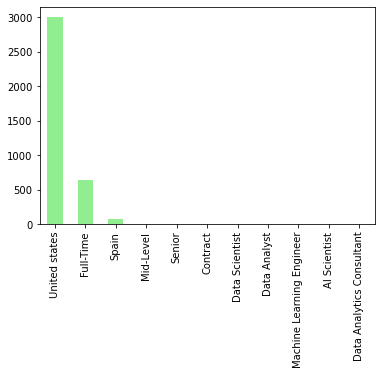

In [27]:
top_10_jobs=ds_data.job_title.value_counts()[:11]
top_10_jobs.plot(kind="bar",color='lightgreen')
plt.show()

In [28]:
loc=ds_data["company_location"]==ds_data["employee_residence"]

In [29]:
loc.value_counts()

True     3659
False      96
dtype: int64

### Employees with their residence the same as the company location

<AxesSubplot:>

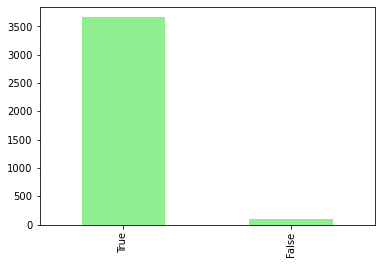

In [30]:
loc.value_counts().plot(kind='bar',color='lightgreen')

### Top 10 company location with most employees

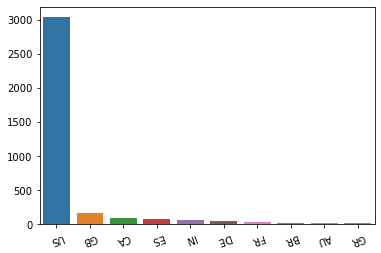

In [34]:
top_10_LOC = ds_data['company_location'].value_counts().head(10)  # Selecting the top 10 company locations
sea.barplot(x=top_10_LOC.index, y=top_10_LOC.values)
plt.xticks(rotation=200)  # Rotate x-axis labels for better readability
plt.show()


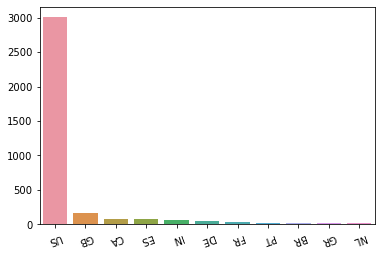

In [35]:
top_10 = ds_data['employee_residence'].value_counts().head(11)  # Selecting the top 11 company RESIDENCE
sea.barplot(x=top_10.index, y=top_10.values)
plt.xticks(rotation=200)  # Rotate x-axis labels for better readability
plt.show()


### Multivariate analysis


##### average salary over the years

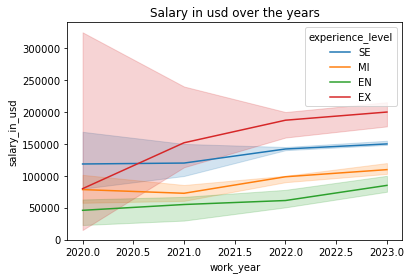

In [36]:
sea.lineplot(data=ds_data,x="work_year",y="salary_in_usd",estimator=np.median,hue="experience_level")
plt.title("Salary in usd over the years")
plt.show()
             

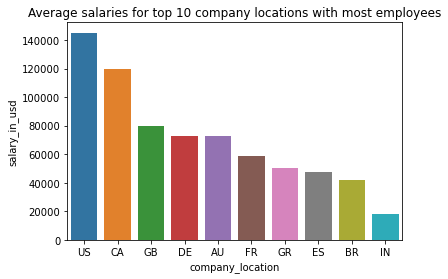

In [37]:
Top_loc_salaries=ds_data.groupby(ds_data[ds_data.company_location.isin(top_10_LOC.index.to_list())].company_location)\
["salary_in_usd"].median()\
.sort_values(ascending=False)\
.reset_index()
plt.figure(figsize=(6,4))
sea.barplot(data=Top_loc_salaries,x=Top_loc_salaries.company_location,y=Top_loc_salaries.salary_in_usd)
plt.title("Average salaries for top 10 company locations with most employees")
plt.show()


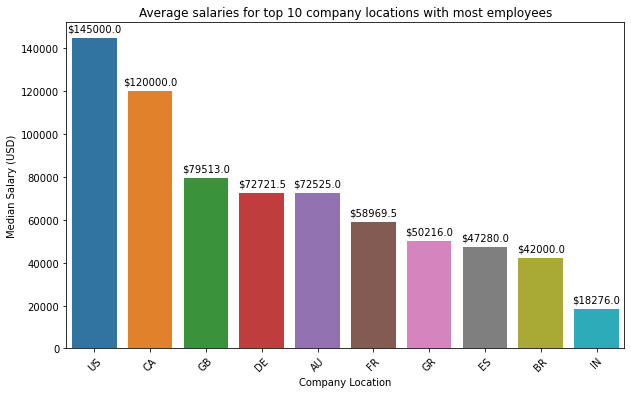

In [38]:
Top_loc_salaries = ds_data.groupby(ds_data[ds_data.company_location.isin(top_10_LOC.index.to_list())].company_location)["salary_in_usd"].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
barplot = sea.barplot(data=Top_loc_salaries, x='company_location', y='salary_in_usd')

plt.title("Average salaries for top 10 company locations with most employees")

# Adding data labels
for index, row in Top_loc_salaries.iterrows():
    plt.text(row.name, row.salary_in_usd + 3000, f'${row.salary_in_usd:.1f}', color='black', ha="center")

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Company Location")
plt.ylabel("Median Salary (USD)")
plt.show()


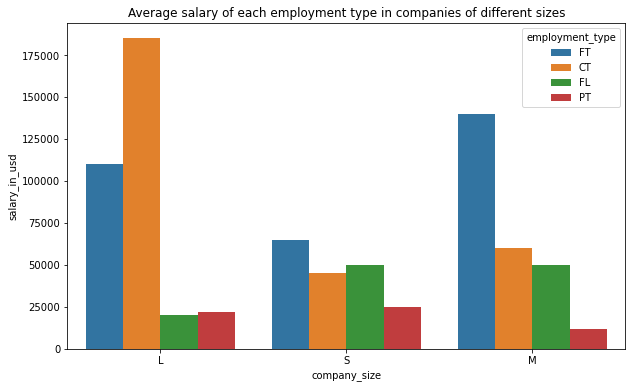

In [39]:
plt.figure(figsize=(10,6))
sea.barplot(data=ds_data, x="company_size", y="salary_in_usd",hue="employment_type" ,estimator=np.median, ci=None)
plt.title("Average salary of each employment type in companies of different sizes")
plt.show()


In [40]:
ds_data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

<IPython.core.display.Javascript object>

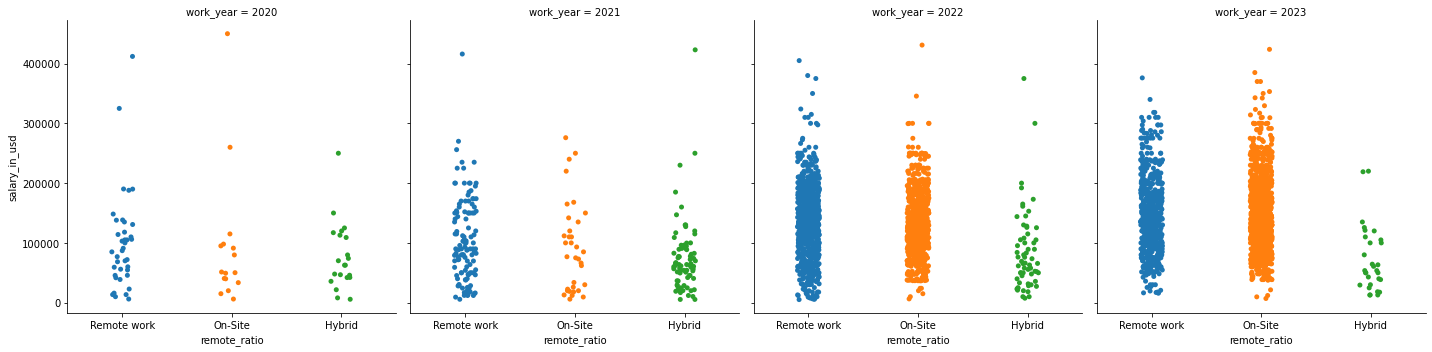

In [41]:
sns.catplot(data=ds_data,x="remote_ratio",y="salary_in_usd",col="work_year",estimator=np.median)
plt.show()

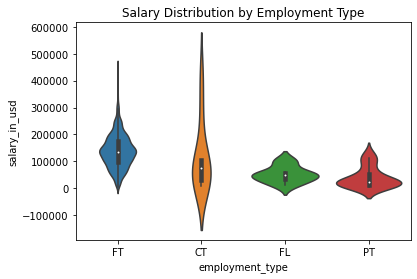

In [42]:
sea.violinplot(data=ds_data, x='employment_type', y='salary_in_usd')
plt.title("Salary Distribution by Employment Type")
plt.show()


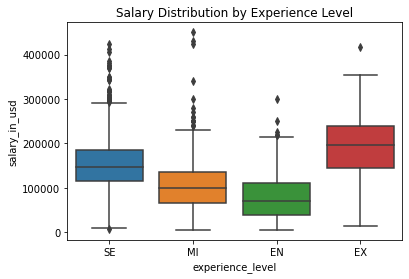

In [43]:
sea.boxplot(data=ds_data, x='experience_level', y='salary_in_usd')
plt.title("Salary Distribution by Experience Level")
plt.show()

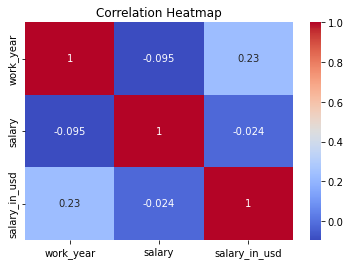

In [44]:
corr_matrix = ds_data.corr()
sea.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

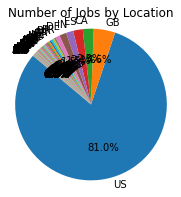

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ds_data is your DataFrame containing job data
job_counts_by_location = ds_data['company_location'].value_counts()

# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(job_counts_by_location, labels=job_counts_by_location.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Jobs by Location')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
